In [28]:
# importing necesary PKGS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import plotly
import plotly.express as px
from pandas_profiling import ProfileReport
# lets set up the plotly template
template_style = "plotly_white"


In [7]:
# reading the dta from data sources / data folders
data = pd.read_excel('data/data.xlsx', engine='openpyxl')


In [8]:
# EXPLORATORY DATA  ANALYSIS
data.tail()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3307,9989,CA-2017-163629,2020-11-17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
3308,9991,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
3309,9992,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
3310,9993,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
3311,9994,CA-2017-119914,2020-05-04,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


TRADITIONAL DATA EXPOLORATION


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Mode      3312 non-null   object        
 4   Customer ID    3312 non-null   object        
 5   Customer Name  3312 non-null   object        
 6   Segment        3312 non-null   object        
 7   Country        3312 non-null   object        
 8   City           3312 non-null   object        
 9   State          3312 non-null   object        
 10  Postal Code    3312 non-null   int64         
 11  Region         3312 non-null   object        
 12  Product ID     3312 non-null   object        
 13  Category       3312 non-null   object        
 14  Sub-Category   3312 non-null   object        
 15  Product Name   3312 n

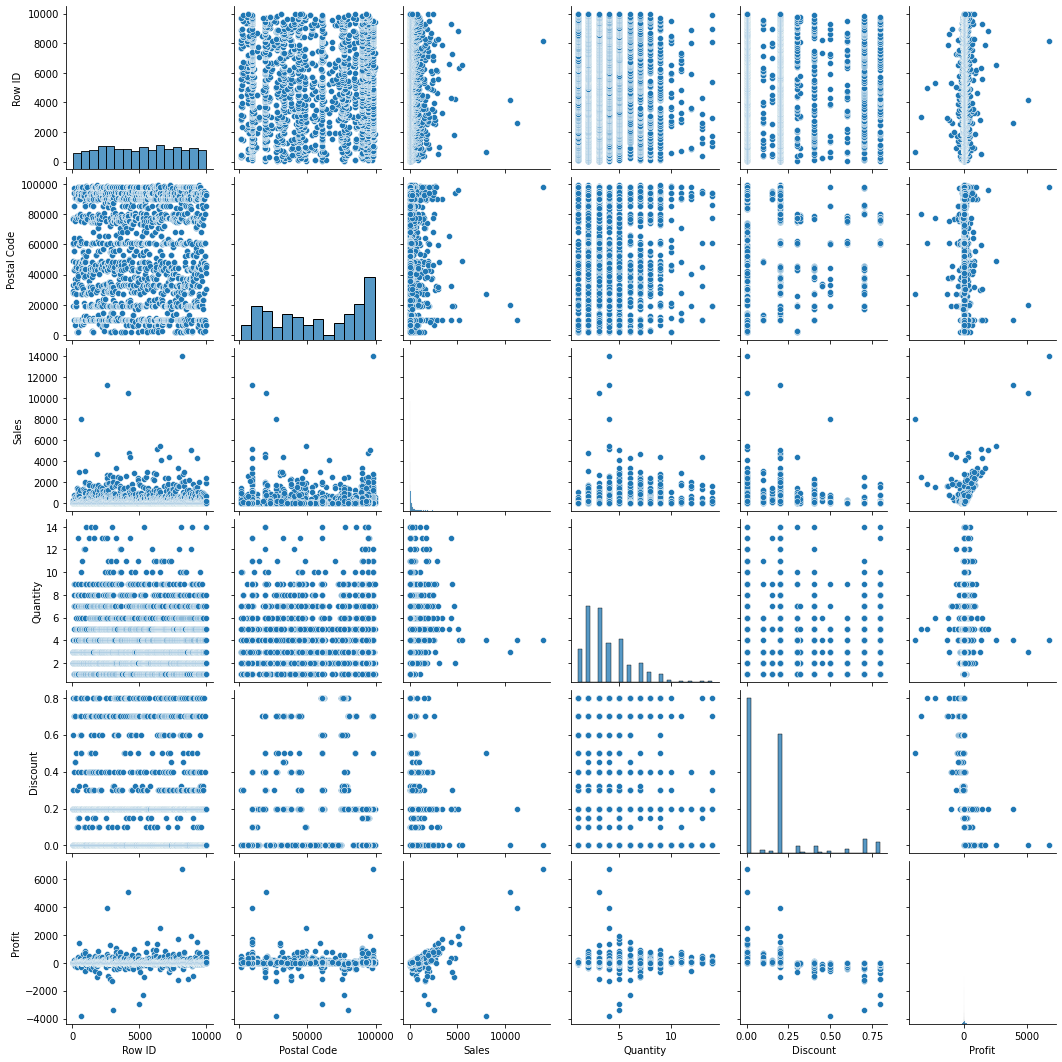

In [10]:
# DEEGING DEEPER AND UNDERSTANDING THE DATA
data.describe()
# VISUALIZING POSSIBLE RELATIONSHIPS FROM THE DATA
sns.pairplot(data)

In [11]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
# what are some of the unique  values in ship mode\
# getting the count of nuiques values
data['Ship Mode'].nunique()
# what are this unique values exactly
data['Ship Mode'].unique()
data['Ship Mode'].value_counts()

Standard Class    1897
Second Class       657
First Class        572
Same Day           186
Name: Ship Mode, dtype: int64

in tearms of sheep mode, we have 4 unique entities, interms of counts. the first one is the countstandard class with 1897 folowed by 652 from second class . first class with 572 and larstl;y is same day sheeping. with 1867 sheeping


this is to to say that starndard class has  majority of sales medum 

<AxesSubplot:ylabel='Frequency'>

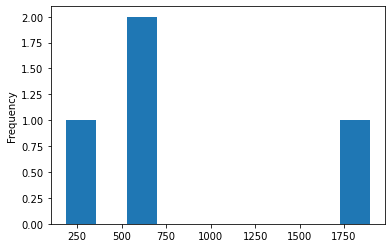

In [13]:
# visualizing the relation ships
data['Ship Mode'].value_counts().plot(kind='hist')

could there be any null; values for any column in the data??. This is good question. let give it a check and

In [14]:
data.isnull().sum()
# our dataframe appears to be clean and no entry of data is mmissing.
# that s sounds good 


Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

it now time we automate the report 
for this task we will use pandas profiling

 to generate panda report we call it and initialize the report to a variable of report 

In [15]:
report  = ProfileReport(data,title='Sales Profiling Report')
# we then have to view it in a notebook 
report.to_widgets()
# we can then export the report into an HTML file
report.to_file("output/SalesReport.html")

Generate report structure: 100%|██████████| 1/1 [00:10<00:00, 10.09s/it]


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]


in 2020, what was the highest sales rate

In [16]:
data['Order Date']
data.nlargest(5,'Sales')

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2710,8154,CA-2017-140151,2020-03-23,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
810,2624,CA-2017-127180,2020-10-22,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
1342,4191,CA-2017-166709,2020-11-17,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
185,684,US-2017-168116,2020-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2142,6521,CA-2017-138289,2020-01-16,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,Michigan,49201,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


In [17]:
# how about the highest sale
data.iloc[data['Sales'].argmax()]

Row ID                                            8154
Order ID                                CA-2017-140151
Order Date                         2020-03-23 00:00:00
Ship Mode                                  First Class
Customer ID                                   RB-19360
Customer Name                             Raymond Buch
Segment                                       Consumer
Country                                  United States
City                                           Seattle
State                                       Washington
Postal Code                                      98115
Region                                            West
Product ID                             TEC-CO-10004722
Category                                    Technology
Sub-Category                                   Copiers
Product Name     Canon imageCLASS 2200 Advanced Copier
Sales                                       13999.9600
Quantity                                             4
Discount  

interms of discount,  what was  the average for Chairs

In [18]:
#    we first need to get the total data from hich the subcategory reflects   chairs

data[data['Sub-Category']=='Chairs']
# we then slce out the column of discount
data[data['Sub-Category']=='Chairs']['Discount']
# we then apply avaagee / mean fuunction on the resultnt output
average_sales_for_chairs=data[data['Sub-Category']=='Chairs']['Discount'].mean()
# lets store everything intoa variable and display the output/
print('the average Sales for chairs in the year of 2020 was {}'.format(average_sales_for_chairs.round(3)))

the average Sales for chairs in the year of 2020 was 0.167


Data Preprocessing
lets generate more columns from  date columns

In [19]:
data['Order_Year'] = data['Order Date'].dt.year
data['Order_Month'] = data['Order Date'].dt.month

In [20]:
data.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2020,10
3,42,CA-2017-120999,2020-09-10,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2020,9
4,44,CA-2017-139619,2020-09-19,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2020,9


<AxesSubplot:ylabel='Frequency'>

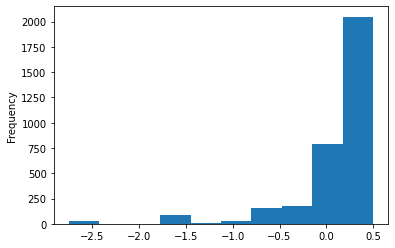

In [21]:
# what could have been the profit mergin for each sales
# to answer this question we need to crae a column for mergin profit
# mergin is the profit realized devide by the total sales made
data['Profit']/data['Sales']
# we then create a column to hold the computed results
data['Profit Mergin'] = data['Profit']/data['Sales']
# lets check that changes have have taken effect on the
data['Profit Mergin'].plot(kind='hist',bins = 10)
# we then visualize the results

Our data is fearly good. lets save a copy to the output folder

In [22]:
data.to_excel("output/output_data.xlsx",index = False)

what was the total profits and sales by category

lets first start by grouping our data by subcategory

In [23]:
grouped_data=data.groupby('Sub-Category').sum()
grouped_data.reset_index(inplace=True)

In [90]:
grouped_data.head()

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Profit Mergin
0,Accessories,1449605,15762114,59946.2320,1079,19.80,15672.3570,555500,2153,62.655000
1,Appliances,874517,9377881,42926.9320,654,29.10,7865.2683,333300,1255,-36.133889
2,Art,1377681,16355998,8863.0680,1101,22.20,2221.9631,569640,2146,70.995000
3,Binders,2500416,29015384,72788.0450,2067,189.10,7669.7418,1010000,3841,-107.832500
4,Bookcases,384522,4483249,30024.2797,276,16.32,-583.6261,153520,552,-11.233641


lets create a function that is going to create a group by based on a given column function takes in a column and returns a dataframe

In [24]:
def group_data(col):
    """
    group data by a column and a return a grouped dataframe

    """
    data_temp = data.groupby(col).sum()
    data_temp.reset_index(inplace=True)
    return data_temp
group_data('Segment')
# our function is the conermed to be working well


,Segment,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Profit Mergin
0,Consumer,8561367,92871614,331904.6999,6282,264.12,45568.2391,3369360,13115,186.803297
1,Corporate,5023960,54879479,241847.8244,3758,154.68,26782.3633,1979600,7679,111.247822
2,Home Office,3263173,38338645,159462.7309,2436,99.42,21088.6672,1341280,4811,86.078886


lets dig deeper into further analysis

In [25]:
# lets get sales description 
data['Sales'].describe()

count     3312.000000
mean       221.381418
std        585.257531
min          0.444000
25%         17.018000
50%         53.810000
75%        205.105700
max      13999.960000
Name: Sales, dtype: float64

In [29]:
# lets create a plot
fig = px.histogram(data,x='Sales',template = template_style)
fig.show()

In [30]:
# is there any form of skew in the data, and what the could tbe the direction of the skew
# fro this we plot box plot as it is the best in ientifying the outliers in the data
fig = px.box(data,y='Sales',range_y=[0,1000],template = template_style)
fig.show()

lets now get a fill of sales by subcategory

In [32]:
df=group_data('Sub-Category')
df.head()

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Profit Mergin
0,Accessories,1449605,15762114,59946.2320,1079,19.80,15672.3570,555500,2153,62.655000
1,Appliances,874517,9377881,42926.9320,654,29.10,7865.2683,333300,1255,-36.133889
2,Art,1377681,16355998,8863.0680,1101,22.20,2221.9631,569640,2146,70.995000
3,Binders,2500416,29015384,72788.0450,2067,189.10,7669.7418,1010000,3841,-107.832500
4,Bookcases,384522,4483249,30024.2797,276,16.32,-583.6261,153520,552,-11.233641


In [33]:
# Create Chart
fig = px.bar(df,
             x='Sub-Category',
             y='Sales',
             title='<b>Sales by Sub Category</b>',
             template = template_style,
             )

# Display Plot
fig.show()
# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Sub_Cat.html', auto_open=False)

'output/Sales_Sub_Cat.html'

what was the profit by sub cateegory.

In [34]:
# Create Chart
fig = px.bar(df,
             x='Sub-Category',
             y='Profit',
             title='<b>Profit by Sub Category</b>',
             template = template_style)

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Profit_Sub_Cat.html', auto_open=False)

'output/Profit_Sub_Cat.html'

lets ceck how profit compares to sales made

In [35]:
# Create Chart
fig = px.bar(df,
             x='Sub-Category',
             y='Sales', color='Profit',
             color_continuous_scale=["red","yellow","green"],
             template = template_style,
             title = '<b>Sales & Profit by Sub Category</b>')

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename ='output/Profit_Sales_Sub_Cat.html', auto_open=False)

'output/Profit_Sales_Sub_Cat.html'

coulld there be any negative profits, lets inpect that 

In [36]:
# Create Chart
fig = px.scatter(data,
                 x='Sales',
                 y='Profit',
                 color='Discount',
                 template = template_style,
                 title = '<b>Scatterplot Sales/Profit</b>')

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Profit_Scatterplot.html', auto_open=False)

'output/Sales_Profit_Scatterplot.html'

what is the discount mean by subcategory

In [37]:
data_discount = data.groupby('Sub-Category').agg({'Discount':'mean',
                                                    'Profit':'sum'})
data_discount.head()

,Discount,Profit
Sub-Category,,
Accessories,0.072000,15672.3570
Appliances,0.176364,7865.2683
Art,0.078723,2221.9631
Binders,0.378200,7669.7418
Bookcases,0.214737,-583.6261


In [38]:
# Create Chart
fig = px.bar(data_discount,
             x=data_discount.index,
             y='Discount',
             color='Profit',
             color_continuous_scale=['red','yellow','green'],
             template = template_style,
             title = '<b>Mean Discount by Sub Category</b>')

# Display Plot
fig.show()

# Export Chart to HTML

lets plot the profit and sales for the year 2020

In [39]:
# sorting values by order date
sorted_data = data.sort_values(by=['Order Date'])
# adding cummulative for  sales and profit
sorted_data['cummulative_sales'] = sorted_data['Sales'].cumsum()
sorted_data['cummulative_profit'] = sorted_data['Profit'].cumsum()
# getting the tail and head of the cummulted results
sorted_data.tail(3)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Profit Mergin,cummulative_sales,cummulative_profit
252,909,CA-2017-143259,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,2020,12,0.3750,733180.6312,93428.2758
360,1298,CA-2017-115427,2020-12-30,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,GBC Binding covers,20.720,2,0.2,6.4750,2020,12,0.3125,733201.3512,93434.7508
359,1297,CA-2017-115427,2020-12-30,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,2020,12,0.3250,733215.2552,93439.2696


In [40]:
# visualizing the results
# Create Chart
fig = px.line(sorted_data,
              x='Order Date',
              y=['cummulative_sales','cummulative_profit'],
              template = template_style,
              title= '<b>Sales/Profit Development</b>')

# Display Plot
fig.show()
# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Profit_Development.html', auto_open=False)

'output/Sales_Profit_Development.html'

In [119]:
# we are now done big up and congratulatuions to us data analyst

In [41]:
# COMMING SOON MACHINE LEARING TO PREDICT THE LIKELY PROFIT

In [43]:
data.head().T

,0,1,2,3,4
Row ID,13,24,35,42,44
Order ID,CA-2017-114412,US-2017-156909,CA-2017-107727,CA-2017-120999,CA-2017-139619
Order Date,2020-04-15 00:00:00,2020-07-16 00:00:00,2020-10-19 00:00:00,2020-09-10 00:00:00,2020-09-19 00:00:00
Ship Mode,Standard Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,AA-10480,SF-20065,MA-17560,LC-16930,ES-14080
Customer Name,Andrew Allen,Sandra Flanagan,Matt Abelman,Linda Cazamias,Erin Smith
Segment,Consumer,Consumer,Home Office,Corporate,Corporate
Country,United States,United States,United States,United States,United States
City,Concord,Philadelphia,Houston,Naperville,Melbourne
State,North Carolina,Pennsylvania,Texas,Illinois,Florida
